In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Загрузка и подготовка данных

In [3]:
data = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Консультация\all_v2.csv")

In [5]:
data.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


In [6]:
data.shape

(5477006, 13)

In [4]:
df = data.sample(frac = 0.001, random_state = 42).reset_index(drop = True)
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,13719304,2020-06-02,21:21:22,55.869536,37.458076,3,2,5,20,1,53.00,10.0,11
1,1601000,2019-06-30,06:06:07,55.030393,83.015545,9654,1,5,10,3,59.02,8.5,11
2,1200000,2019-08-21,02:37:16,55.030393,83.015545,9654,1,1,10,-1,33.58,5.0,11
3,1650000,2018-12-19,22:04:21,45.141191,38.992274,2843,2,6,7,1,40.00,10.0,1
4,6100000,2020-11-18,18:26:54,43.651925,39.652122,2843,2,6,13,2,47.60,10.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5472,4700000,2019-09-10,12:28:45,44.676140,37.788100,2843,2,4,16,2,69.30,14.0,1
5473,10056480,2019-07-03,20:56:58,55.883203,37.635533,3,2,5,15,2,65.60,18.6,11
5474,4300000,2020-12-11,05:33:00,55.051001,82.886987,9654,3,2,4,2,60.00,9.1,1
5475,7150000,2020-06-24,19:20:24,55.801542,37.827904,3,3,3,9,2,41.30,5.6,1


In [19]:
df['date'].max()

'2021-05-01'

<Axes: xlabel='date', ylabel='area'>

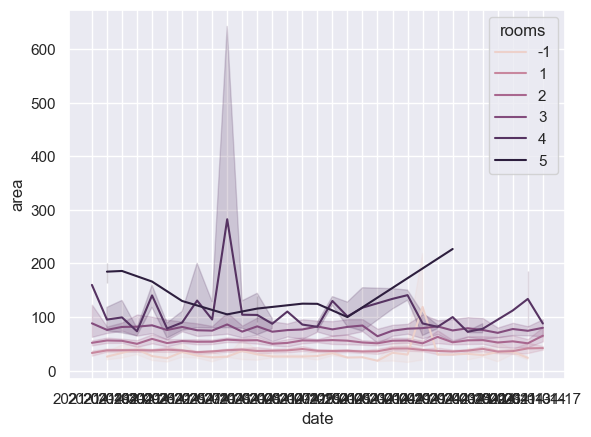

In [23]:
sns.set(palette = 'deep')
sns.lineplot(data = df[df['date']>='2021-04-01'], x = 'date', y = 'area', hue = 'rooms', errorbar = ('ci', 99))

### Доверительный интервал для площади 1к и 2к квартир

In [6]:
df1k = df.loc[df['rooms']==1, 'area']
df2k = df.loc[df['rooms']==2, 'area']

alpha = 0.95

mean_1k = df1k.mean()
var_1k = df1k.var()
n_1k = df1k.count()

ci_1k = stats.norm.interval(confidence = alpha, loc = mean_1k, scale = np.sqrt(var_1k/n_1k))
print(f'95% доверительный интервал для средней площади 1к квартиры от {ci_1k[0].round(2)} до {ci_1k[1].round(2)} кв м')

mean_2k = df2k.mean()
var_2k = df2k.var()
n_2k = df2k.count()

ci_2k = stats.norm.interval(confidence = alpha, loc = mean_2k, scale = np.sqrt(var_2k/n_2k))
print(f'95% доверительный интервал для средней площади 2к квартиры от {ci_2k[0].round(2)} до {ci_2k[1].round(2)} кв м')

95% доверительный интервал для средней площади 1к квартиры от 37.88 до 38.59 кв м
95% доверительный интервал для средней площади 2к квартиры от 54.77 до 56.23 кв м


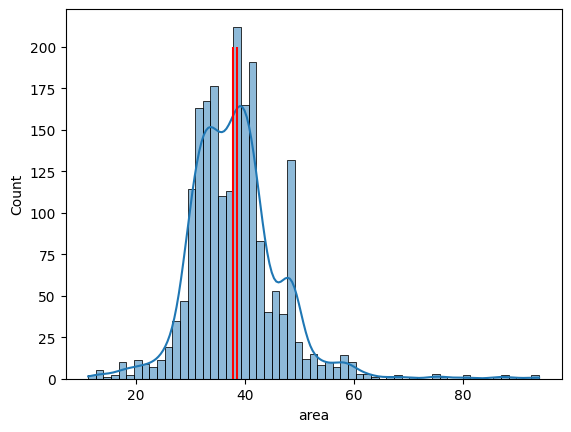

In [14]:
fig = plt.figure()
sns.histplot(df1k[df1k<100], kde = True)
plt.vlines(x = ci_1k[0], ymin = 0, ymax = 200, color = 'r')
plt.vlines(x = ci_1k[1], ymin = 0, ymax = 200, color = 'r')
plt.show()

### Корреляция Пирсона

In [15]:
df['area'].corr(df['rooms'])

np.float64(0.6398590930356632)

In [16]:
df['area'].corr(df['kitchen_area'])

np.float64(0.523918348161834)

### Линейная регрессия

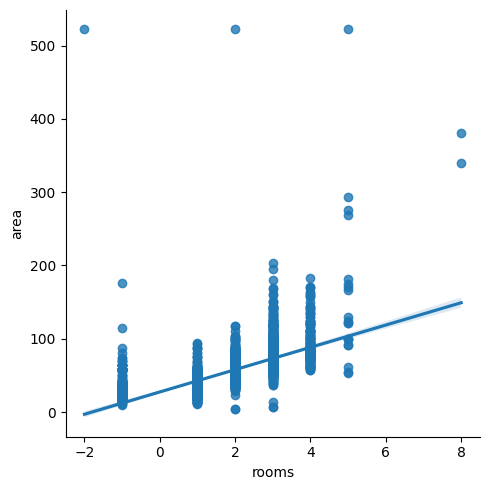

In [26]:
sns.lmplot(data = df, x = 'rooms', y = 'area')
plt.show()

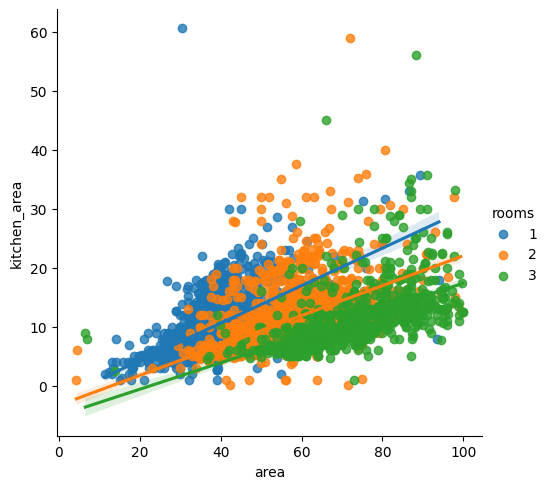

In [27]:
sns.lmplot(
    data = df[(df['rooms']<=3)&(df['rooms']>0)&(df['area']<100)], 
    x = 'area', 
    y = 'kitchen_area', 
    hue = 'rooms'
)
plt.show()

### Тесты на нормальность распределения

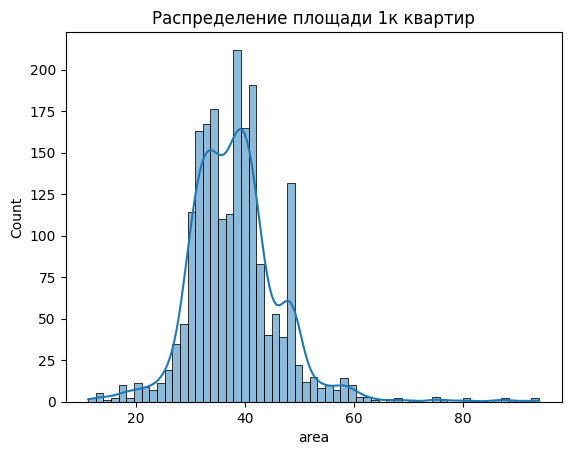

In [28]:
fig = plt.figure()
plt.title('Распределение площади 1к квартир')
sns.histplot(df1k[df1k<100], kde = True)
plt.show()

##### Тест Шапиро-Уилка

In [29]:
stats.shapiro(df1k[df1k<100])

ShapiroResult(statistic=np.float64(0.9268453142790758), pvalue=np.float64(1.922479727206859e-30))

p-значение очень маленькое, т.е. нулевая гипотеза отвергается и распределение нельзя считать нормальным

##### Тест Андерсона-Дарлинга

In [8]:
res_test = stats.anderson(df1k[df1k<100], dist='norm')

scipy.stats._morestats.AndersonResult

In [37]:
res_test.critical_values

array([0.575, 0.655, 0.785, 0.916, 1.09 ])

In [35]:
def anderson_results_2(res_test, sig_level = 5):
    idx = np.argwhere(res_test.significance_level == 5)[0][0]
    #idx = np.where(res_test.significance_level == 5)[0][0]
    crit_value = res_test.critical_values[idx]
    obs_value = res_test.statistic
    decision = np.where(obs_value >= crit_value, 'H0 отвергаем, переменная не имеет нормального распределения', 'H0 не отвергаем, переменная имеет нормальное распределение')
    print('Тестовая статистика:', obs_value)
    print('Критическое значение статистики:', crit_value)
    print('Вывод', decision)

In [22]:
def anderson_results(res_test, sig_level = 5):
    crit_value = res_test.critical_values[res_test.significance_level == sig_level][0]
    obs_value = res_test.statistic
    decision = np.where(obs_value >= crit_value, 'H0 отвергаем, переменная не имеет нормального распределения', 'H0 не отвергаем, переменная имеет нормальное распределение')
    print('Тестовая статистика:', obs_value)
    print('Критическое значение статистики:', crit_value)
    print('Вывод', decision)

In [23]:
anderson_results(res_test)

Тестовая статистика: 22.54097672499256
Критическое значение статистики: 0.785
Вывод H0 отвергаем, переменная не имеет нормального распределения


In [36]:
anderson_results_2(res_test)

Тестовая статистика: 22.54097672499256
Критическое значение статистики: 0.785
Вывод H0 отвергаем, переменная не имеет нормального распределения


Для уровня значимости 0,05 критическое значение составляет 0,785, а наблюдаемое значение 22,54

Наблюдаемая статистика гораздо выше критического значения => отвергаем нулевую гипотезу

##### Тест Колмогорова-Смирнова

In [32]:
stats.kstest(df1k[df1k<100], stats.norm.cdf)

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(0.0), statistic_location=np.float64(11.3), statistic_sign=np.int8(-1))

р-значение является очень низким, т.е. нулевая гипотеза отвергается. Распределение площади 1к квартир не является нормальным

### T-тесты

In [33]:
df1k_price = df.loc[(df['rooms']==1)&(df['area']<100)&(df['price']<5000000), 'price']
df2k_price = df.loc[(df['rooms']==2)&(df['area']<100)&(df['price']<5000000), 'price']

##### Тест о математическом ожидании (одновыборочный t-тест)

In [40]:
print('Средняя цена 1к квартиры с площадью менее 100 кв м составляет', df1k_price.mean().round(2))

Средняя цена 1к квартиры с площадью менее 100 кв м составляет 2287945.16


In [41]:
print('Средняя цена 2к квартиры с площадью менее 100 кв м составляет', df2k_price.mean().round(2))

Средняя цена 2к квартиры с площадью менее 100 кв м составляет 2789717.24


Протестируем гипотезу о том, что математическое ожидание цены 1к квартиры составляет 2300000 рублей

In [42]:
stats.ttest_1samp(df1k_price, popmean = 2300000, alternative = 'two-sided')

TtestResult(statistic=np.float64(-0.5117813686740527), pvalue=np.float64(0.6088668446187095), df=np.int64(1799))

p-значение более 5%, то есть нулевую гипотезу отвергнуть нельзя

Средняя цена 1к квартиры может составлять 2 300 000 рублей

##### Тест о равенстве мат ожиданий (двухвыборочный t-тест)

Протестируем гипотезу, что средняя цена 1к квартиры и 2к квартиры площадью до 100 кв м совпадают

In [43]:
stats.ttest_ind(df1k_price, df2k_price, alternative = 'two-sided')

TtestResult(statistic=np.float64(-13.83090918895356), pvalue=np.float64(2.8453354734197768e-42), df=np.float64(3126.0))

p-значение оказалось ниже 5%, то есть нулевая гипотеза о том, что средние цены 1к и 2к квартир равны, отвергается